In [1]:
from __future__ import absolute_import, division, print_function

# First exploration

## Imports

In [2]:
import json
import datetime
import os

import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.patches as mpatches

%matplotlib inline


## Duration of all rides

The data is publicly available from Citi Bike (or on Google Big Query). It has been commited to a local PostreSQL database. The aggregated information was retrieved from that database and saved to a file on disk.

### Read output data

In [3]:
data_dir = os.path.join(os.getcwd(),'..','..','data')
df = pd.read_csv(os.path.join(data_dir,'output.csv'))

In [4]:
df.head()

,yr,mth,n_rides,duration
0,2013,7,843416,841814103
1,2013,8,1001958,981498245
2,2013,9,1034359,936116179
3,2013,10,1037712,856750338
4,2013,11,675774,521213583


In [5]:
# convert year and month columns (currently strings) to datetime object
df['date'] = df['yr'].apply(str) + '-' + df['mth'].apply(str)
df['date'] = df['date'].apply(pd.to_datetime)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 5 columns):
yr          38 non-null int64
mth         38 non-null int64
n_rides     38 non-null int64
duration    38 non-null int64
date        38 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(4)
memory usage: 1.6 KB


## Plot timeline

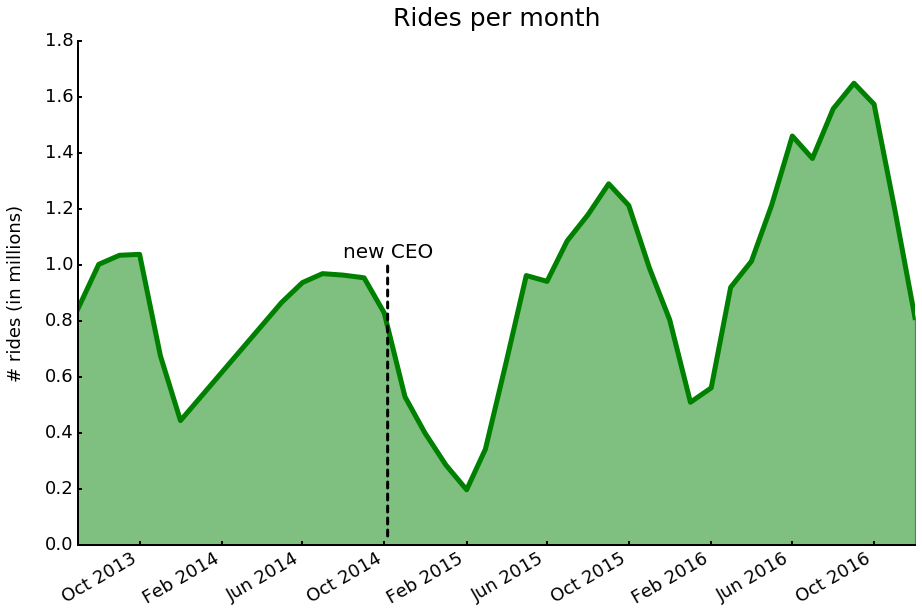

In [7]:
dates = df['date'].tolist()
trips = df['n_rides'].tolist()
trips = [x/1e6 for x in trips]
fig, ax = plt.subplots(figsize=(15, 10))
plt.plot(dates,trips,'g-', alpha=1,lw=5)
# rotate and align the tick labels so they look better
fig.autofmt_xdate()
# use a more precise date string for the x axis locations in the
# toolbar
ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
plt.title('fig.autofmt_xdate fixes the labels')
ax.fill_between(dates, 0, trips, facecolor='green', alpha=0.5)
# plt.xlabel('Date', fontsize=18)
plt.ylabel('# rides (in millions)', fontsize=18)
ax.yaxis.labelpad = 20
plt.title('Rides per month', fontsize=25,y=1.02)
# plt.grid(True)
ax.tick_params(labelsize=18)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Set witdh of axes spines and ticks
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.xaxis.set_tick_params(width=2)
ax.yaxis.set_tick_params(width=2)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# 
ax.annotate('new CEO', xy=(0.37, 0.01),  xycoords='axes fraction',
            xytext=(0.37, 0.6), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', arrowstyle="-",linestyle='dashed',lw=3 ),
            horizontalalignment='center', verticalalignment='top',
            fontsize=20)
plt.savefig(os.path.join(data_dir,'plots','rides_per_month_ceo.pdf'), bbox_inches='tight')

The seasonality is obvious: fewer rides in winter, especially in a climate like NYC. The new (and current) CEO revamped most of the operational procedures and initiated growth.

## Revenue data

The revenue data were extracted from the monthly operation reports (PDF) available frmo the Citi Bike website.

In [8]:
data_dir = os.path.join(os.getcwd(),'..','..','data')
df_rev = pd.read_csv(os.path.join(data_dir,'citibike_revenue.txt'))
# convert year and month to datetime object
df_rev['date'] = df_rev['year'].apply(str) + '-' + df_rev['month'].apply(str)
df_rev['date'] = df_rev['date'].apply(pd.to_datetime)
df_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 5 columns):
year           42 non-null int64
month          42 non-null int64
revenue        42 non-null float64
sponsorship    42 non-null float64
date           42 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 1.7 KB


In [9]:
df_rev.head()

,year,month,revenue,sponsorship,date
0,2016,12,1408457.0,350000.0,2016-12-01
1,2016,11,1645955.0,0.0,2016-11-01
2,2016,10,5038493.0,2019743.0,2016-10-01
3,2016,9,4827824.0,0.0,2016-09-01
4,2016,8,5370069.0,750000.0,2016-08-01


In [10]:
# Calculate revenue from operations-only
df_rev['revenue_operations'] = df_rev['revenue'] - df_rev['sponsorship']

In [11]:
df_rev.head()

,year,month,revenue,sponsorship,date,revenue_operations
0,2016,12,1408457.0,350000.0,2016-12-01,1058457.0
1,2016,11,1645955.0,0.0,2016-11-01,1645955.0
2,2016,10,5038493.0,2019743.0,2016-10-01,3018750.0
3,2016,9,4827824.0,0.0,2016-09-01,4827824.0
4,2016,8,5370069.0,750000.0,2016-08-01,4620069.0


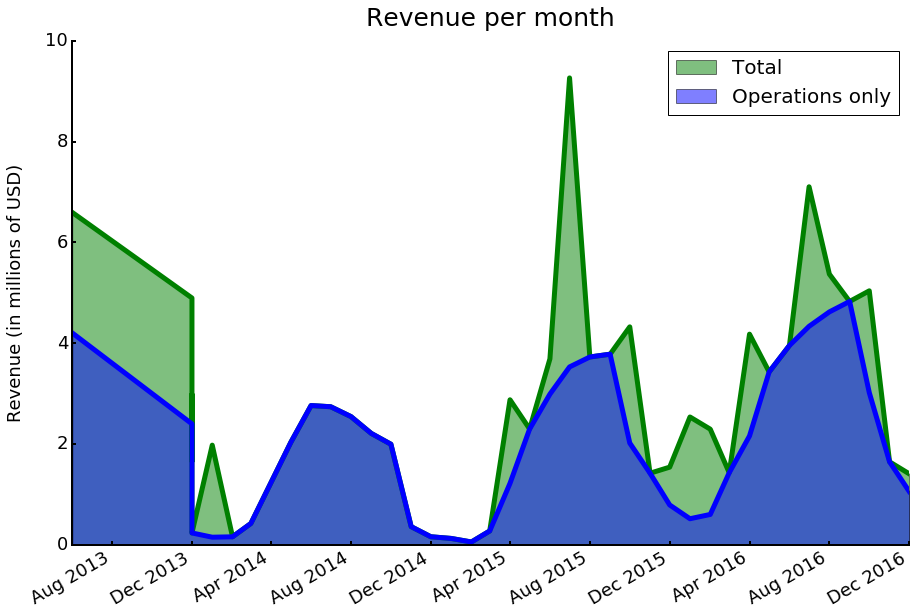

In [12]:
dates = df_rev['date'].tolist()
revenue = df_rev['revenue'].tolist()
revenue_operations = df_rev['revenue_operations'].tolist()
revenue = [x/1e6 for x in revenue]
revenue_operations = [x/1e6 for x in revenue_operations]

fig, ax = plt.subplots(figsize=(15, 10))
plt.plot(dates,revenue,'g-', alpha=1,lw=5)
plt.plot(dates,revenue_operations,'b-', alpha=1,lw=5)


# rotate and align the tick labels so they look better
fig.autofmt_xdate()
# use a more precise date string for the x axis locations in the
# toolbar
ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
plt.title('fig.autofmt_xdate fixes the labels')
ax.fill_between(dates, 0, revenue, facecolor='green', alpha=0.5,label='Total')
ax.fill_between(dates, 0, revenue_operations, facecolor='blue', alpha=.5,label='Operations only')


# plt.xlabel('Date', fontsize=18)
plt.ylabel('Revenue (in millions of USD)', fontsize=18)
ax.yaxis.labelpad = 20
plt.title('Revenue per month', fontsize=25,y=1.02)
# plt.grid(True)
ax.tick_params(labelsize=18)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Ser witdh of axes spines and ticks
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.xaxis.set_tick_params(width=2)
ax.yaxis.set_tick_params(width=2)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

ax.legend(prop={'size': 20})

plt.savefig(os.path.join(data_dir,'plots','revenue_per_month.pdf'), bbox_inches='tight')

## Detailed revenue streams

Also extracted from the monthly operation reports.

In [13]:
data_dir = os.path.join(os.getcwd(),'..','..','data')
df_rev = pd.read_csv(os.path.join(data_dir,'citibike_financials.csv'))
# convert year and month to datetime object
df_rev['date'] = df_rev['year'].apply(str) + '-' + df_rev['month'].apply(str)
df_rev['date'] = df_rev['date'].apply(pd.to_datetime)


In [14]:
df_rev.head()



,year,month,annual_membership,daily_membership,weekly_membership,3day_membership,casual_membership,annual_overages,casual_overages,other_revenue,refunds_and_discounts,taxes,sponsorship,date
0,2016,12,707292.0,0.0,0.0,0,166722.0,106021.0,71392.0,16551.0,96034.0,86513.0,350000.0,2016-12-01
1,2016,11,855995.0,0.0,0.0,0,382525.0,182297.0,214826.0,37720.0,161486.0,134078.0,0.0,2016-11-01
2,2016,10,1879996.0,0.0,0.0,0,618539.0,155886.0,282510.0,43197.0,206624.0,246238.0,2019743.0,2016-10-01
3,2016,9,2849377.0,0.0,0.0,0,1114166.0,181111.0,428385.0,48236.0,180897.0,387445.0,0.0,2016-09-01
4,2016,8,2952587.0,0.0,0.0,0,824894.0,157146.0,460426.0,45099.0,190321.0,370238.0,750000.0,2016-08-01


In [15]:
# Calculate total revenue
df_rev['total_revenue'] = df_rev['annual_membership']+df_rev['casual_membership']+df_rev['annual_overages']+df_rev['casual_overages']+df_rev['other_revenue']-df_rev['refunds_and_discounts']+df_rev['taxes']+df_rev['sponsorship'] 

In [16]:
# Total revnue in 2016
df_rev['total_revenue'][df_rev['year'] == 2016].sum()

43215767.0

In [17]:
# calculate and extract various revnue groups
annual_revenue_over = (df_rev['annual_membership'] + df_rev['annual_overages']).apply(lambda x: x/1e6).tolist()
casual_revenue_over = (df_rev['casual_membership'] + df_rev['casual_overages']).apply(lambda x: x/1e6).tolist()
annual_revenue = (df_rev['annual_membership']).apply(lambda x: x/1e6).tolist()
casual_revenue = (df_rev['casual_membership']).apply(lambda x: x/1e6).tolist()
annual_casual_revenue = (df_rev['annual_membership'] + df_rev['annual_overages'] + 
                         df_rev['casual_membership'] + df_rev['casual_overages']).apply(lambda x: x/1e6).tolist()

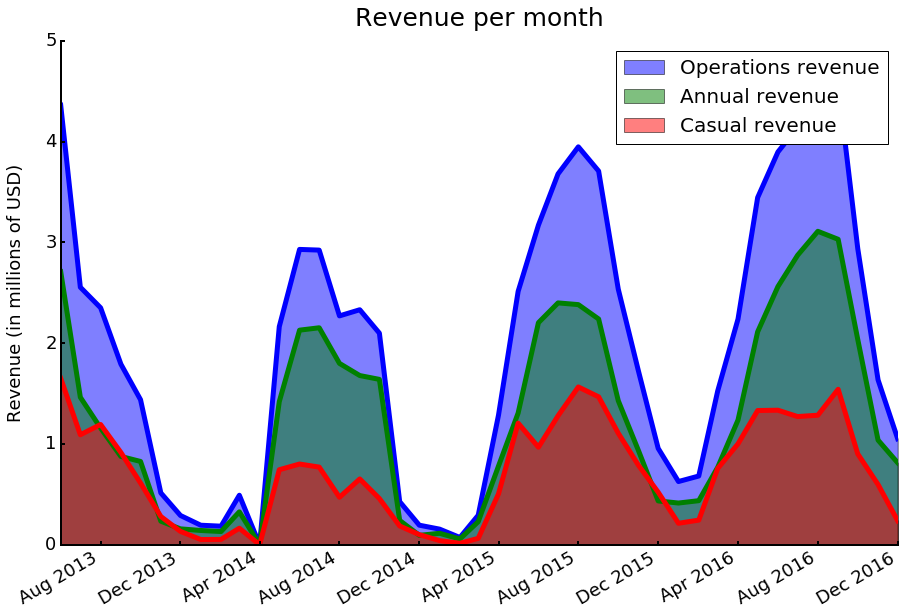

In [18]:
# Plot the revenue groups
annual_revenue_offset = [x+y for x,y in zip(annual_revenue,casual_revenue)]
dates_rev = df_rev['date'].tolist()


fig, ax = plt.subplots(figsize=(15, 10))
plt.plot(dates_rev,annual_casual_revenue,'b-', alpha=1,lw=5)

plt.plot(dates_rev,annual_revenue_over,'g-',alpha=1,lw=5)

plt.plot(dates_rev,casual_revenue_over,'r-',alpha=1,lw=5)


# rotate and align the tick labels so they look better
fig.autofmt_xdate()
# use a more precise date string for the x axis locations in the
# toolbar
ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
plt.title('fig.autofmt_xdate fixes the labels')
ax.fill_between(dates_rev, 0, annual_casual_revenue, facecolor='blue', alpha=.5,label='Operations revenue')
ax.fill_between(dates_rev, 0, annual_revenue_over, facecolor='green', alpha=.5,label='Annual revenue')
ax.fill_between(dates_rev, 0, casual_revenue_over, facecolor='red', alpha=.5,label='Casual revenue')




# plt.xlabel('Date', fontsize=18)
plt.ylabel('Revenue (in millions of USD)', fontsize=18)
ax.yaxis.labelpad = 20
plt.title('Revenue per month', fontsize=25,y=1.02)
# plt.grid(True)
ax.tick_params(labelsize=18)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Ser witdh of axes spines and ticks
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.xaxis.set_tick_params(width=2)
ax.yaxis.set_tick_params(width=2)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

ax.legend(prop={'size': 20})

plt.savefig(os.path.join(data_dir,'plots','revenue_per_month_detailed.pdf'), bbox_inches='tight')

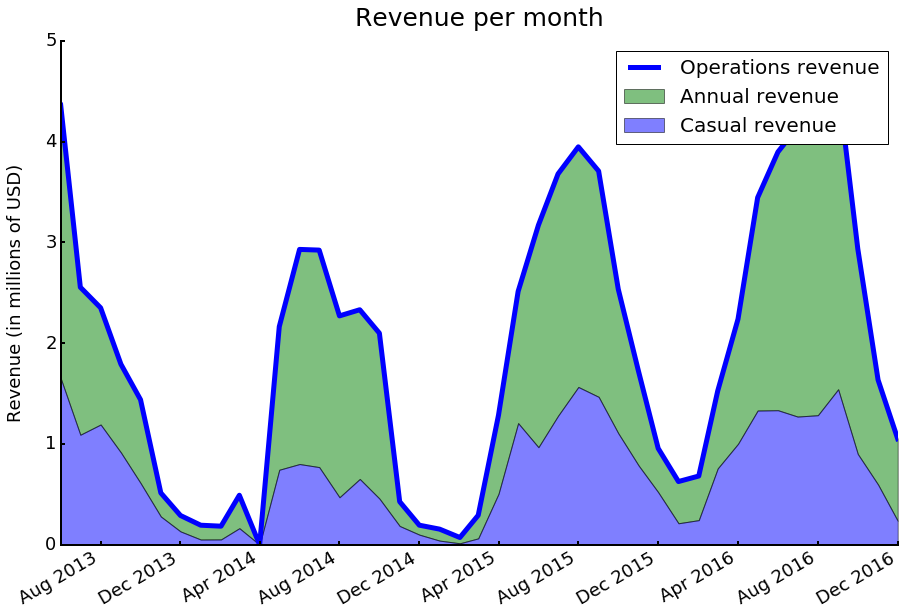

In [19]:
# Plot parts of operational revenue
annual_revenue_offset = [x+y for x,y in zip(annual_revenue,casual_revenue)]

fig, ax = plt.subplots(figsize=(15, 10))
plt.plot(dates_rev,annual_casual_revenue,'b-', alpha=1,lw=5,label='Operations revenue')

# plt.plot(dates_rev,annual_revenue_over,'g-',alpha=1,lw=5)

# plt.plot(dates_rev,casual_revenue_over,'r-',alpha=1,lw=5)


# rotate and align the tick labels so they look better
fig.autofmt_xdate()
# use a more precise date string for the x axis locations in the
# toolbar
ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
plt.title('fig.autofmt_xdate fixes the labels')
# ax.fill_between(dates_rev, 0, annual_casual_revenue, facecolor='blue', alpha=0.5,label='Operations revenue')
ax.fill_between(dates_rev, casual_revenue_over, [x+y for x,y in zip(annual_revenue_over,casual_revenue_over)], facecolor='green', alpha=.5,label='Annual revenue')
ax.fill_between(dates_rev, 0, casual_revenue_over, facecolor='blue', alpha=.5,label='Casual revenue')




# plt.xlabel('Date', fontsize=18)
plt.ylabel('Revenue (in millions of USD)', fontsize=18)
ax.yaxis.labelpad = 20
plt.title('Revenue per month', fontsize=25,y=1.02)
# plt.grid(True)
ax.tick_params(labelsize=18)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Set witdh of axes spines and ticks
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.xaxis.set_tick_params(width=2)
ax.yaxis.set_tick_params(width=2)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

ax.legend(prop={'size': 20})

# plt.savefig(os.path.join(data_dir,'plots','revenue_per_month_detailed.pdf'), bbox_inches='tight')

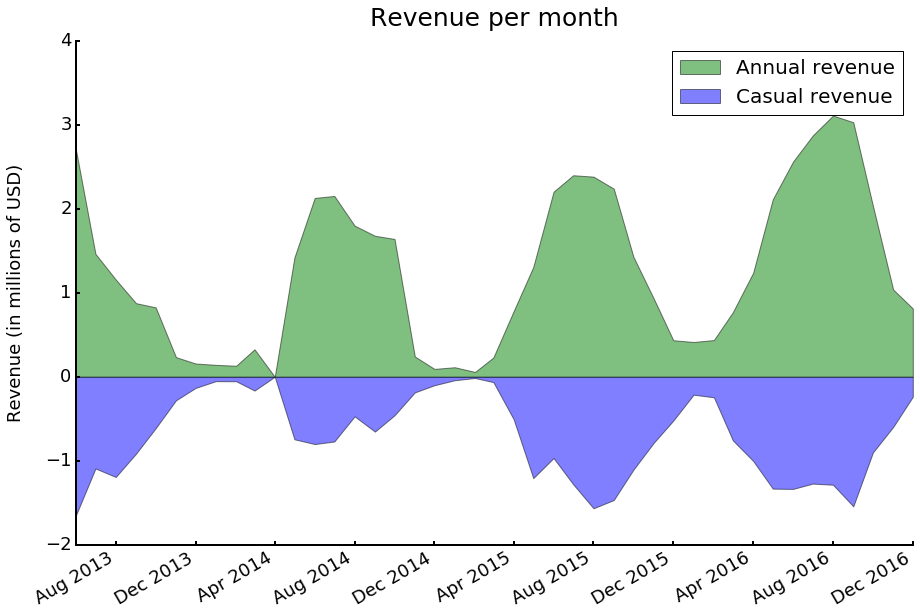

In [20]:
# Plot parts of operational revenue
# Same as above, but different style

fig, ax = plt.subplots(figsize=(15, 10))

# rotate and align the tick labels so they look better
fig.autofmt_xdate()
# use a more precise date string for the x axis locations in the
# toolbar
ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
plt.title('fig.autofmt_xdate fixes the labels')
# ax.fill_between(dates_rev, 0, annual_casual_revenue, facecolor='blue', alpha=0.5,label='Operations revenue')
ax.fill_between(dates_rev, 0, annual_revenue_over, facecolor='green', alpha=.5,label='Annual revenue')
ax.fill_between(dates_rev, 0, [-x for x in casual_revenue_over], facecolor='blue', alpha=.5,label='Casual revenue')

plt.ylabel('Revenue (in millions of USD)', fontsize=18)
ax.yaxis.labelpad = 20
plt.title('Revenue per month', fontsize=25,y=1.02)
# plt.grid(True)
ax.tick_params(labelsize=18)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Ser witdh of axes spines and ticks
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.xaxis.set_tick_params(width=2)
ax.yaxis.set_tick_params(width=2)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

ax.legend(prop={'size': 20})

# plt.savefig(os.path.join(data_dir,'plots','revenue_per_month_detailed.pdf'), bbox_inches='tight')

## Overages

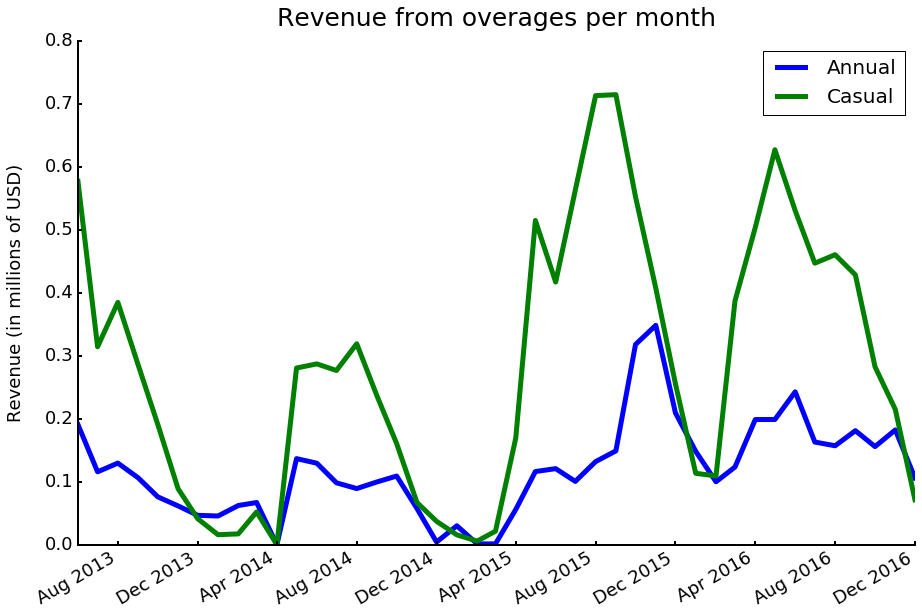

In [21]:
annual_overages = df_rev['annual_overages'].apply(lambda x: x/1e6).tolist()
casual_overages = df_rev['casual_overages'].apply(lambda x: x/1e6).tolist()

fig, ax = plt.subplots(figsize=(15, 10))
plt.plot(dates_rev,annual_overages,'b-', alpha=1,lw=5,label='Annual')

plt.plot(dates_rev,casual_overages,'g-',alpha=1,lw=5,label='Casual')

# rotate and align the tick labels so they look better
fig.autofmt_xdate()
# use a more precise date string for the x axis locations in the
# toolbar
ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
plt.title('fig.autofmt_xdate fixes the labels')
# plt.xlabel('Date', fontsize=18)
plt.ylabel('Revenue (in millions of USD)', fontsize=18)
ax.yaxis.labelpad = 20
plt.title('Revenue from overages per month', fontsize=25,y=1.02)
# plt.grid(True)
ax.tick_params(labelsize=18)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Ser witdh of axes spines and ticks
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.xaxis.set_tick_params(width=2)
ax.yaxis.set_tick_params(width=2)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

ax.legend(prop={'size': 20})

plt.savefig(os.path.join(data_dir,'plots','revenue_from_overages_per_month.pdf'), bbox_inches='tight')

Casual customers pay much more in overage fees than annual customers. Even though they are only responsible for a fraction of the revenue.

## How often do the customer cohorts incur overage charges?

In [22]:
data_dir = os.path.join(os.getcwd(),'..','..','data')
df = pd.read_csv(os.path.join(data_dir,'customer_tripdurations_histogram_2016.csv'))
df.head()

,bucket_floor,bucket_name,count
0,0,0 to 900,425454
1,900,900 to 1800,731853
2,1800,1800 to 2700,203399
3,2700,2700 to 3600,56573
4,3600,3600 to 4500,26379


In [23]:
df.describe()

,bucket_floor,count
count,6.090000e+02,609.000000
mean,5.271695e+05,2476.310345
std,7.566273e+05,35323.164368
min,0.000000e+00,1.000000
25%,1.368000e+05,1.000000
50%,2.853000e+05,2.000000
75%,5.787000e+05,8.000000
max,6.706800e+06,731853.000000


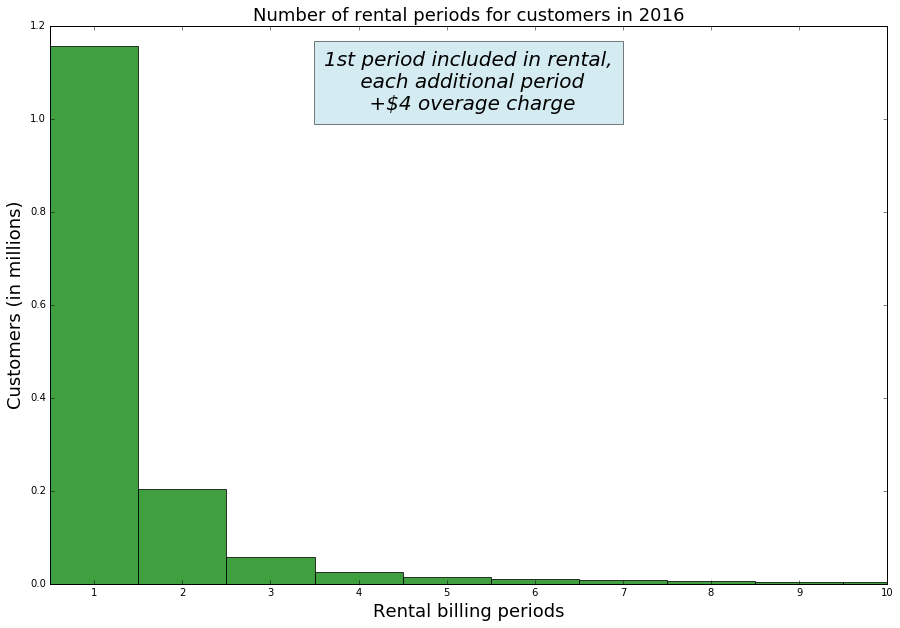

In [24]:
# What is the distribution of rental duration for the 'customer' cohort in 2016?
n_customers = df['count'][df['count'] >= 100].tolist()
n_customers = [x/1e6 for x in n_customers]
duration = df['bucket_floor'][df['count'] >= 100].tolist()
duration = [x/900 for x in duration] 
# account for the fact that the first usage period is 30min, whereas overage charges are billed per 15min (900s)
tmp_customers = n_customers[0]+n_customers[1]
n_customers = n_customers[2:]
n_customers.insert(0,tmp_customers)
tmp = duration.pop()
#
fig, ax = plt.subplots(figsize=(15, 10))
plt.bar(duration, n_customers, 1., color='g',align='center',alpha=0.75)
plt.xticks(xrange(len(duration)), [int(x+1) for x in duration])
plt.xlabel('Rental billing periods', fontsize=18)
plt.ylabel('Customers (in millions)', fontsize=18)
plt.title('Number of rental periods for customers in 2016', fontsize=18)
plt.xlim(-0.5,9)
# plt.grid(True)
# ax.tick_params(labelsize=18)
# 
# ax.annotate('1st period included in rental,\n each additional period\n $4 overage charge', xy=(0.5, 0.85),xycoords='axes fraction',horizontalalignment='center',
#             fontsize=20)

ax.text(0.5, 0.85, '1st period included in rental,\n each additional period\n +$4 overage charge', style='italic',
        horizontalalignment='center', bbox={'facecolor':'lightblue', 'alpha':0.5, 'pad':10},
        transform=ax.transAxes,fontsize=20)

plt.show()




In [25]:
df = pd.read_csv(os.path.join(data_dir,'subscriber_tripdurations_histogram_2016.csv'))
df.head()

,bucket_floor,bucket_name,count
0,0,0 to 900,8890782
1,900,900 to 1800,2745016
2,1800,1800 to 2700,560627
3,2700,2700 to 3600,60874
4,3600,3600 to 4500,13470


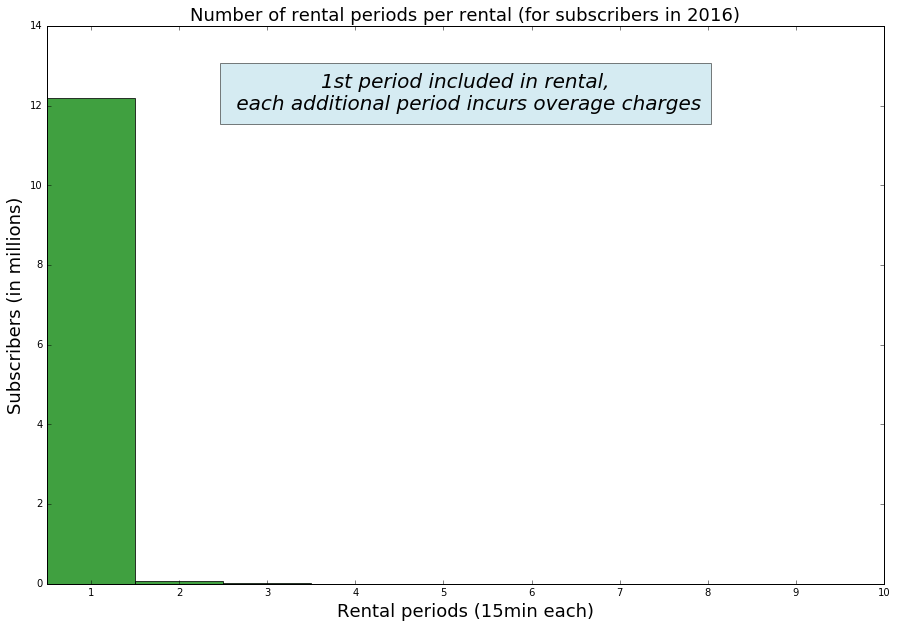

In [26]:
# What is the distribution of rental duration for the 'customer' cohort in 2016?
n_customers = df['count'][df['count'] >= 100].tolist()
n_customers = [x/1e6 for x in n_customers]
duration = df['bucket_floor'][df['count'] >= 100].tolist()
duration = [x/900 for x in duration] 
n_customers = []
for idx,dur in enumerate(duration):
    if idx == 0:
        n_customers.append(df['count'].iloc[idx])
    elif idx <=2:
        n_customers[0] += df['count'].iloc[idx]
    else:
        if idx%2 != 0:
            n_customers.append(df['count'].iloc[idx])
        else:
            n_customers[-1] += df['count'].iloc[idx]
new_duration = np.arange(len(n_customers))
n_customers = [x/1e6 for x in n_customers]
#
fig, ax = plt.subplots(figsize=(15, 10))
plt.bar(new_duration, n_customers, 1., color='g',align='center',alpha=0.75)
plt.xticks(xrange(len(new_duration)), [int(x+1) for x in new_duration])
plt.xlabel('Rental periods (15min each)', fontsize=18)
plt.ylabel('Subscribers (in millions)', fontsize=18)
plt.title('Number of rental periods per rental (for subscribers in 2016)', fontsize=18)
plt.xlim(-0.5,9)
# plt.grid(True)
# ax.tick_params(labelsize=18)
ax.text(0.5, 0.85, '1st period included in rental,\n each additional period incurs overage charges', style='italic',
        horizontalalignment='center', bbox={'facecolor':'lightblue', 'alpha':0.5, 'pad':10},
        transform=ax.transAxes,fontsize=20)

plt.show()



## Refunds and discounts 

In [27]:
refunds = df_rev['refunds_and_discounts'].apply(lambda x: x/1e6).tolist()

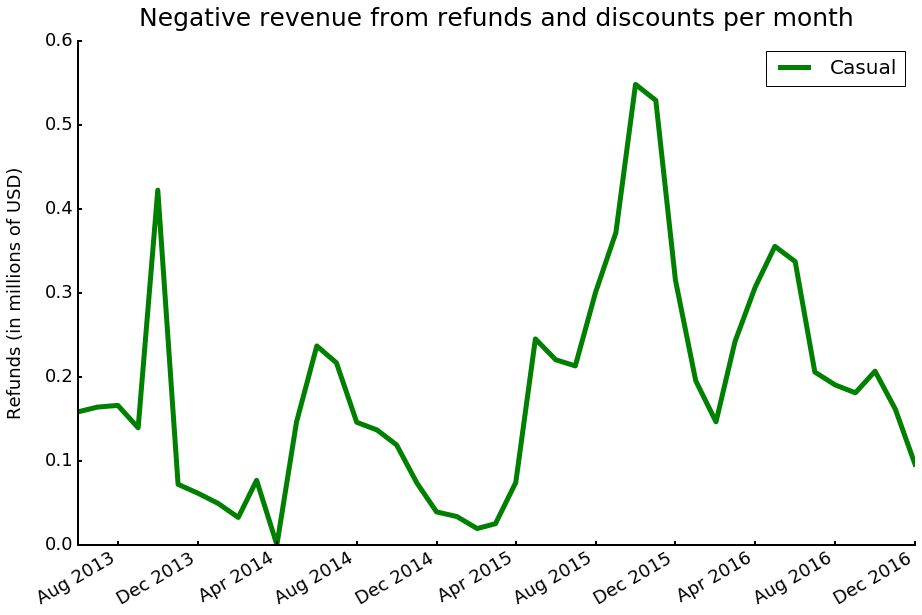

In [28]:
fig, ax = plt.subplots(figsize=(15, 10))

plt.plot(dates_rev,refunds,'g-',alpha=1,lw=5,label='Casual')

# rotate and align the tick labels so they look better
fig.autofmt_xdate()
# use a more precise date string for the x axis locations in the
# toolbar
ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
plt.title('fig.autofmt_xdate fixes the labels')

plt.ylabel('Refunds (in millions of USD)', fontsize=18)
ax.yaxis.labelpad = 20
plt.title('Negative revenue from refunds and discounts per month', fontsize=25,y=1.02)
# plt.grid(True)
ax.tick_params(labelsize=18)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Ser witdh of axes spines and ticks
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.xaxis.set_tick_params(width=2)
ax.yaxis.set_tick_params(width=2)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

ax.legend(prop={'size': 20})

plt.savefig(os.path.join(data_dir,'plots','revenue_from_refunds_per_month.pdf'), bbox_inches='tight')

## Cohort analysis

In [29]:
df_rev[df_rev['year'] == 2016]

,year,month,annual_membership,daily_membership,weekly_membership,3day_membership,casual_membership,annual_overages,casual_overages,other_revenue,refunds_and_discounts,taxes,sponsorship,date,total_revenue
0,2016,12,707292.0,0.0,0.0,0,166722.0,106021.0,71392.0,16551.0,96034.0,86513.0,350000.0,2016-12-01,1408457.0
1,2016,11,855995.0,0.0,0.0,0,382525.0,182297.0,214826.0,37720.0,161486.0,134078.0,0.0,2016-11-01,1645955.0
2,2016,10,1879996.0,0.0,0.0,0,618539.0,155886.0,282510.0,43197.0,206624.0,246238.0,2019743.0,2016-10-01,5039485.0
3,2016,9,2849377.0,0.0,0.0,0,1114166.0,181111.0,428385.0,48236.0,180897.0,387445.0,0.0,2016-09-01,4827823.0
4,2016,8,2952587.0,0.0,0.0,0,824894.0,157146.0,460426.0,45099.0,190321.0,370238.0,750000.0,2016-08-01,5370069.0
5,2016,7,2708797.0,0.0,0.0,0,824963.0,163083.0,446971.0,47718.0,205635.0,348426.0,2768750.0,2016-07-01,7103073.0
6,2016,6,2319057.0,0.0,0.0,0,804637.0,242749.0,530354.0,74548.0,337113.0,319854.0,0.0,2016-06-01,3954086.0
7,2016,5,1914147.0,592963.0,56925.0,54936,704824.0,198839.0,626999.0,62994.0,355272.0,276872.0,0.0,2016-05-01,3429403.0
8,2016,4,1039209.0,421233.0,76928.0,0,498161.0,198778.0,503603.0,52275.0,306950.0,174721.0,2018750.0,2016-04-01,4178547.0
9,2016,3,645910.0,312749.0,57870.0,0,370619.0,123398.0,387021.0,29789.0,241861.0,114870.0,0.0,2016-03-01,1429746.0


In [30]:
df_rev['total_subscriber_revenue'] = df_rev['annual_membership'] + df_rev['annual_overages']
df_rev['total_customer_revenue'] = df_rev['casual_membership'] + df_rev['casual_overages']

In [31]:
total_revenue_2016 = df_rev['total_revenue'][df_rev['year'] == 2016].sum()
sponsorship_revenue_2016 = df_rev['sponsorship'][df_rev['year'] == 2016].sum()
operational_revenue_2016 = total_revenue_2016 - sponsorship_revenue_2016
annual_revenue_2016 = df_rev['total_subscriber_revenue'][df_rev['year'] == 2016].sum()
casual_revenue_2016 = df_rev['total_customer_revenue'][df_rev['year'] == 2016].sum()
#
total_revenue_2015 = df_rev['total_revenue'][df_rev['year'] == 2015].sum()
sponsorship_revenue_2015 = df_rev['sponsorship'][df_rev['year'] == 2015].sum()
operational_revenue_2015 = total_revenue_2015 - sponsorship_revenue_2015
annual_revenue_2015 = df_rev['total_subscriber_revenue'][df_rev['year'] == 2015].sum()
casual_revenue_2015 = df_rev['total_customer_revenue'][df_rev['year'] == 2015].sum()

In [32]:
# Growth in revenue
print((total_revenue_2016-total_revenue_2015)/total_revenue_2015)

0.283839568518


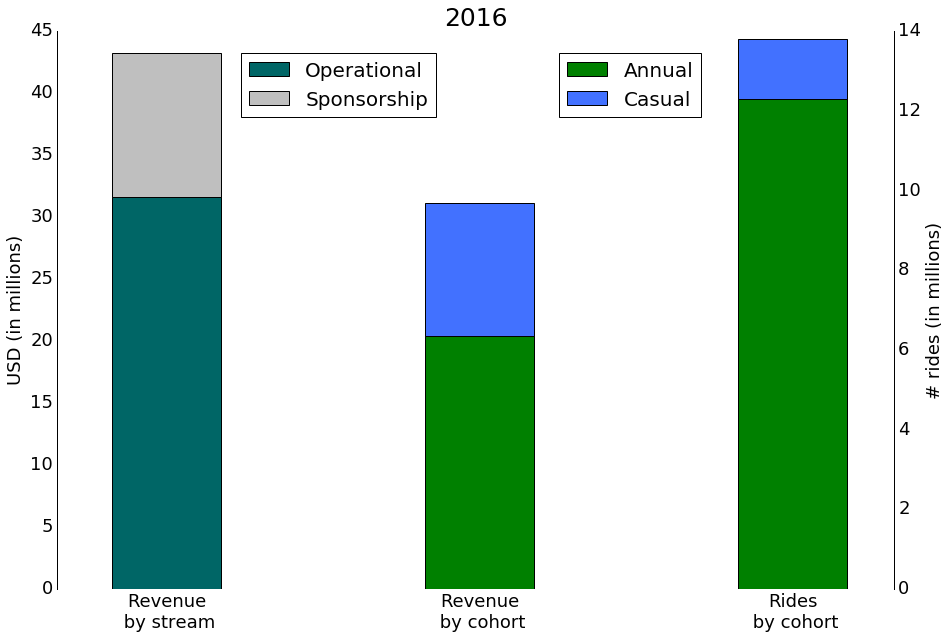

In [33]:
fig, ax = plt.subplots(figsize=(15, 10))

N = 2
lower = (operational_revenue_2016/1e6,annual_revenue_2016/1e6)
upper = (sponsorship_revenue_2016/1e6,casual_revenue_2016/1e6)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = ax.bar(ind[0], lower[0], width, color='#006666',label='Operational')
p2 = ax.bar(ind[0], upper[0], width, color='0.75',
             bottom=lower[0],label='Sponsorship')

p1 = ax.bar(ind[1], lower[1], width, color='green')
p2 = ax.bar(ind[1], upper[1], width, color=(0.2588,0.4433,1.0),
             bottom=lower[1])
#
ax.legend(prop={'size': 20},loc=(0.22,0.845))
ax.set_ylabel('USD')
ax.set_title('2016',fontsize=25)
ax.set_xticks(ind + width/2.)
# Hide the top and bottom spines
ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)
# No xaxis ticks but show text
ax.tick_params(axis=u'both', which=u'both',length=0,labelsize=18)
plt.ylabel('USD (in millions)', fontsize=18)
ax2 = ax.twinx()
p1 = ax2.bar(ind[-1]+1, 12301711./1e6, width, color='green', label='Annual')
p2 = ax2.bar(ind[-1]+1, 1508073./1e6, width, color=(0.2588,0.4433,1.0),
             bottom=12301711./1e6, label='Casual')
# Hide the top and bottom spines
ax2.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
# No xaxis ticks
ax2.xaxis.set_ticks([])
N = 3
ind = np.arange(N)   
ax2.set_xticks(np.array(ind + width/2.))
# No xaxis ticks but show text
ax2.tick_params(axis=u'both', which=u'both',length=0,labelsize=18)
ax2.set_ylabel('# rides (in millions)',fontsize=18 )
ax2.set_xticklabels(('Revenue\n by stream','Revenue\n by cohort','Rides\n by cohort'))
plt.xlim(-width/2., 2.5)
#
ax2.legend(prop={'size': 20},loc=(0.6,0.845))


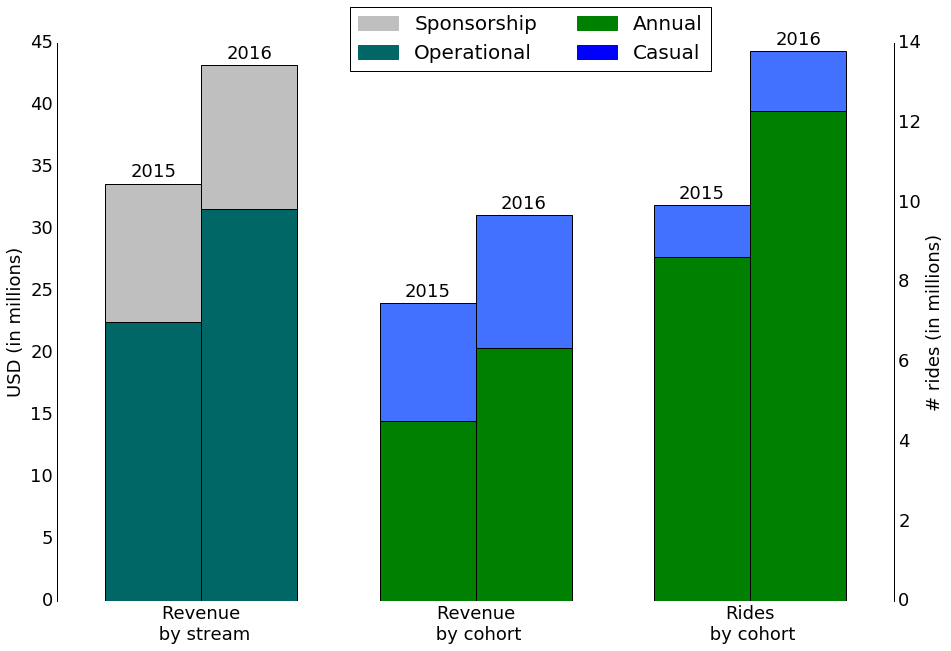

In [34]:
# Add information for 2015 + 2016
fig, ax = plt.subplots(figsize=(15, 10))
#
N = 2
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence
#
lower = (operational_revenue_2015/1e6,annual_revenue_2015/1e6)
upper = (sponsorship_revenue_2015/1e6,casual_revenue_2015/1e6)
#
p1 = ax.bar(ind[0], lower[0], width, color='#006666',label='Operational')
p2 = ax.bar(ind[0], upper[0], width, color='0.75',
             bottom=lower[0],label='Sponsorship')
ax.text(ind[0]+width/2., 0.2+(lower[0]+upper[0]), '2015', ha='center', va='bottom', fontsize=18)
#
p1 = ax.bar(ind[1], lower[1], width, color='green')
p2 = ax.bar(ind[1], upper[1], width, color=(0.2588,0.4433,1.0),
             bottom=lower[1])
ax.text(ind[1]+width/2., 0.2+(lower[1]+upper[1]), '2015', ha='center', va='bottom', fontsize=18)
#
lower = (operational_revenue_2016/1e6,annual_revenue_2016/1e6)
upper = (sponsorship_revenue_2016/1e6,casual_revenue_2016/1e6)
#
p1 = ax.bar(ind[0]+width, lower[0], width, color='#006666',label='Operational')
p2 = ax.bar(ind[0]+width, upper[0], width, color='0.75',
             bottom=lower[0],label='Sponsorship')
ax.text(ind[0]+3*width/2., 0.2+(lower[0]+upper[0]), '2016', ha='center', va='bottom', fontsize=18)
#
p1 = ax.bar(ind[1]+width, lower[1], width, color='green')
p2 = ax.bar(ind[1]+width, upper[1], width, color=(0.2588,0.4433,1.0),
             bottom=lower[1])
ax.text(ind[1]+3*width/2., 0.2+(lower[1]+upper[1]), '2016', ha='center', va='bottom', fontsize=18)
#
# ax.legend(prop={'size': 20},loc=(0.22,0.845))
ax.set_ylabel('USD')
# ax.set_title('2016',fontsize=25)
# ax.set_xticks(ind + width)
# Hide the top and bottom spines
ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)
# No xaxis ticks but show text
ax.tick_params(axis=u'both', which=u'both',length=0,labelsize=18)
plt.ylabel('USD (in millions)', fontsize=18)
#
# Second axis
#
ax2 = ax.twinx()
n_rides_lower = 8626638./1e6
n_rides_upper = 1311331./1e6
n_total = np.array(n_rides_lower+n_rides_upper)

p1 = ax2.bar(ind[-1]+1, n_rides_lower, width, color='green', label='Annual')
p2 = ax2.bar(ind[-1]+1, n_rides_upper, width, color=(0.2588,0.4433,1.0),
             bottom=n_rides_lower, label='Casual')
ax2.text(ind[-1]+1+width/2., 0.05+n_total, '2015', ha='center', va='bottom', fontsize=18)

n_rides_lower = 12301711./1e6
n_rides_upper = 1508073./1e6
n_total = np.array(n_rides_lower+n_rides_upper)


p1 = ax2.bar(ind[-1]+1+width, n_rides_lower, width, color='green', label='Annual')
p2 = ax2.bar(ind[-1]+1+width, n_rides_upper, width, color=(0.2588,0.4433,1.0),
             bottom=n_rides_lower, label='Casual')
ax2.text(ind[-1]+1+3*width/2., 0.05+n_total, '2016', ha='center', va='bottom', fontsize=18)


# Hide the top and bottom spines
ax2.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
# No xaxis ticks
ax2.xaxis.set_ticks([])
N = 3
ind = np.arange(N)   
ax2.set_xticks(np.array(ind + width))
# No xaxis ticks but show text
ax2.tick_params(axis=u'both', which=u'both',length=0,labelsize=18)
ax2.set_ylabel('# rides (in millions)',fontsize=18 )
ax2.set_xticklabels(('Revenue\n by stream','Revenue\n by cohort','Rides\n by cohort'))
plt.xlim(-width/2., ind[-1] + 2.5*width)
#
# ax2.legend(prop={'size': 20},loc=(0.6,0.845))

grey_patch = mpatches.Patch(color='0.75', label='Sponsorship')
greyblue_patch = mpatches.Patch(color='#006666', label='Operational')
green_patch = mpatches.Patch(color='green', label='Annual')
blue_patch = mpatches.Patch(color='blue', label='Casual')

plt.legend(handles=[grey_patch,greyblue_patch,green_patch,blue_patch],
           ncol=2,
           prop={'size': 20},
           loc=(0.35,0.95))


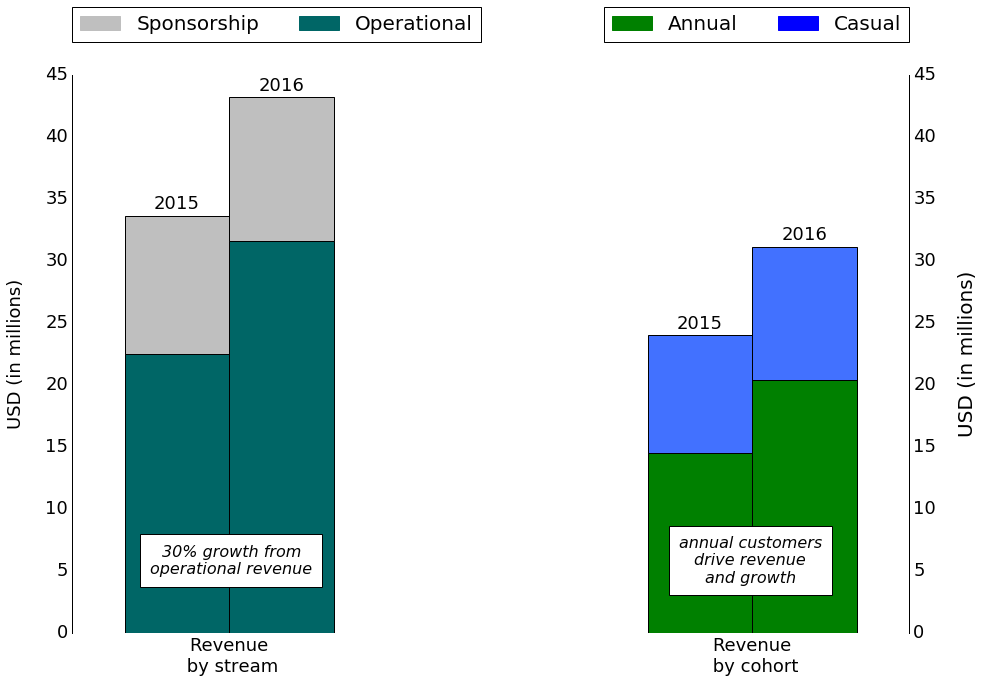

In [54]:
fig, ax = plt.subplots(figsize=(15, 10))
#
N = 2
ind = np.arange(N)    # the x locations for the groups
width = 0.2       # the width of the bars: can also be len(x) sequence
#
lower = (operational_revenue_2015/1e6,annual_revenue_2015/1e6)
upper = (sponsorship_revenue_2015/1e6,casual_revenue_2015/1e6)
#
p1 = ax.bar(ind[0], lower[0], width, color='#006666',label='Operational')
p2 = ax.bar(ind[0], upper[0], width, color='0.75',
             bottom=lower[0],label='Sponsorship')
ax.text(ind[0]+width/2., 0.2+(lower[0]+upper[0]), '2015', ha='center', va='bottom', fontsize=18)
#
p1 = ax.bar(ind[1], lower[1], width, color='green')
p2 = ax.bar(ind[1], upper[1], width, color=(0.2588,0.4433,1.0),
             bottom=lower[1])
ax.text(ind[1]+width/2., 0.2+(lower[1]+upper[1]), '2015', ha='center', va='bottom', fontsize=18)
#

#
# Second axis
#



lower = (operational_revenue_2016/1e6,annual_revenue_2016/1e6)
upper = (sponsorship_revenue_2016/1e6,casual_revenue_2016/1e6)
#
p1 = ax.bar(ind[0]+width, lower[0], width, color='#006666',label='Operational')
p2 = ax.bar(ind[0]+width, upper[0], width, color='0.75',
             bottom=lower[0],label='Sponsorship')
ax.text(ind[0]+3*width/2., 0.2+(lower[0]+upper[0]), '2016', ha='center', va='bottom', fontsize=18)
#
p1 = ax.bar(ind[1]+width, lower[1], width, color='green')
p2 = ax.bar(ind[1]+width, upper[1], width, color=(0.2588,0.4433,1.0),
             bottom=lower[1])
ax.text(ind[1]+3*width/2., 0.2+(lower[1]+upper[1]), '2016', ha='center', va='bottom', fontsize=18)
#
# ax.legend(prop={'size': 20},loc=(0.22,0.845))
ax.set_ylabel('USD')
# ax.set_title('2016',fontsize=25)
ax.set_xticks(ind + width)
ax.set_xticklabels(('Revenue\n by stream','Revenue\n by cohort'))

# Hide the top and bottom spines
ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)
# No xaxis ticks but show text
ax.tick_params(axis=u'both', which=u'both',length=0,labelsize=18)
plt.ylabel('USD (in millions)', fontsize=18, labelpad=20)

grey_patch = mpatches.Patch(color='0.75', label='Sponsorship')
greyblue_patch = mpatches.Patch(color='#006666', label='Operational')
green_patch = mpatches.Patch(color='green', label='Annual')
blue_patch = mpatches.Patch(color='blue', label='Casual')

ax.set_xlim(-width/2., ind[-1] + 2.5*width)
# Acivate tick mark labels on second y axis
for tick in ax.yaxis.get_major_ticks():
    tick.label2On = True

ax.text(1.07, 0.5, 'USD (in millions)',
        horizontalalignment='center', 
        verticalalignment='center', 
        rotation=90,
        transform=ax.transAxes,fontsize=20)


# Two legends
# http://stackoverflow.com/questions/12761806/matplotlib-2-different-legends-on-same-graph
legend1 = plt.legend(handles=[grey_patch,greyblue_patch],
                     bbox_to_anchor=(0., 1.06, 1., .102), 
                     loc=3, 
                     borderaxespad=0.,
                     prop={'size': 20},
                     ncol=2)

plt.legend(handles=[green_patch,blue_patch],
           bbox_to_anchor=(0., 1.02, 1., .102), 
           loc=1, 
           borderaxespad=0.,
           prop={'size': 20},
           ncol=2)


plt.gca().add_artist(legend1)

ax.text(0.19, 0.13, '30% growth from\noperational revenue', style='italic',
        horizontalalignment='center', verticalalignment='center', 
        bbox={'facecolor':'white', 'alpha':1., 'pad':10},
        transform=ax.transAxes,fontsize=16)

ax.text(0.81, 0.13, 'annual customers\ndrive revenue\nand growth', style='italic',
        horizontalalignment='center', verticalalignment='center', 
        bbox={'facecolor':'white', 'alpha':1., 'pad':10},
        transform=ax.transAxes,fontsize=16)




plt.savefig(os.path.join(data_dir,'plots','revenue_2015_2016.pdf'), bbox_inches='tight')
plt.savefig(os.path.join(data_dir,'plots','revenue_2015_2016.png'), bbox_inches='tight')

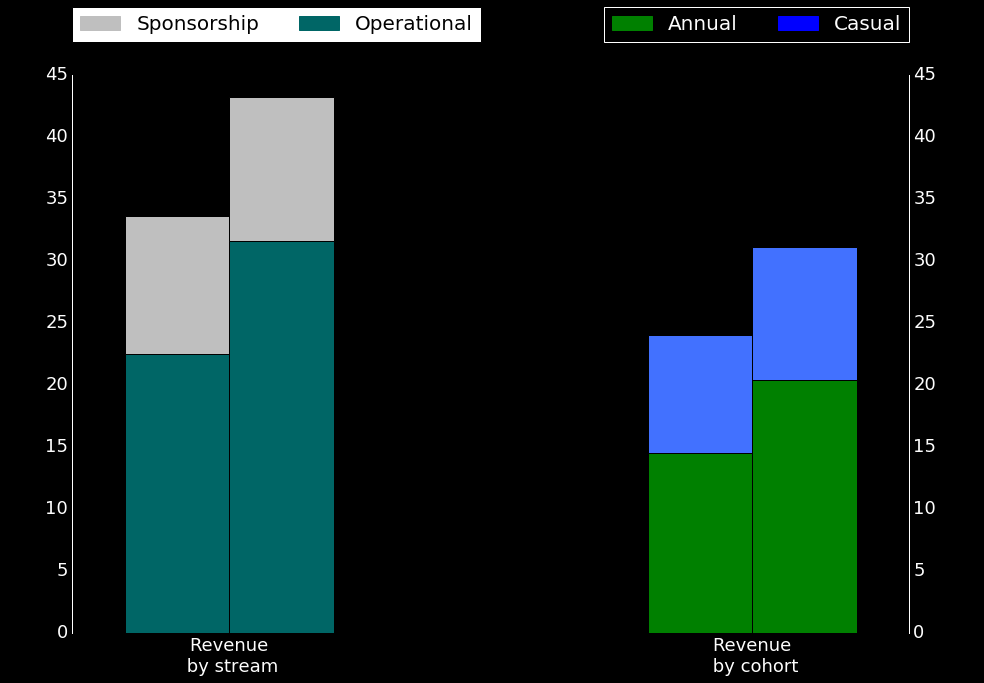

In [36]:
# Try the same plot with black background

bg_color = 'black'
fg_color = 'white'
#

fig, ax = plt.subplots(figsize=(15, 10),facecolor=bg_color, edgecolor=fg_color)
#
fig.patch.set_facecolor(bg_color)
ax.set_axis_bgcolor(bg_color)

ax.xaxis.set_tick_params(color=fg_color, labelcolor=fg_color)
ax.yaxis.set_tick_params(color=fg_color, labelcolor=fg_color)
for spine in ax.spines.values():
    spine.set_color(fg_color)

N = 2
ind = np.arange(N)    # the x locations for the groups
width = 0.2       # the width of the bars: can also be len(x) sequence
#
lower = (operational_revenue_2015/1e6,annual_revenue_2015/1e6)
upper = (sponsorship_revenue_2015/1e6,casual_revenue_2015/1e6)
#
p1 = ax.bar(ind[0], lower[0], width, color='#006666',label='Operational')
p2 = ax.bar(ind[0], upper[0], width, color='0.75',
             bottom=lower[0],label='Sponsorship')
ax.text(ind[0]+width/2., 0.2+(lower[0]+upper[0]), '2015', ha='center', va='bottom', fontsize=18)
#
p1 = ax.bar(ind[1], lower[1], width, color='green')
p2 = ax.bar(ind[1], upper[1], width, color=(0.2588,0.4433,1.0),
             bottom=lower[1])
ax.text(ind[1]+width/2., 0.2+(lower[1]+upper[1]), '2015', ha='center', va='bottom', fontsize=18)
#

#
# Second axis
#
lower = (operational_revenue_2016/1e6,annual_revenue_2016/1e6)
upper = (sponsorship_revenue_2016/1e6,casual_revenue_2016/1e6)
#
p1 = ax.bar(ind[0]+width, lower[0], width, color='#006666',label='Operational')
p2 = ax.bar(ind[0]+width, upper[0], width, color='0.75',
             bottom=lower[0],label='Sponsorship')
ax.text(ind[0]+3*width/2., 0.2+(lower[0]+upper[0]), '2016', ha='center', va='bottom', fontsize=18)
#
p1 = ax.bar(ind[1]+width, lower[1], width, color='green')
p2 = ax.bar(ind[1]+width, upper[1], width, color=(0.2588,0.4433,1.0),
             bottom=lower[1])
ax.text(ind[1]+3*width/2., 0.2+(lower[1]+upper[1]), '2016', ha='center', va='bottom', fontsize=18)
#
# ax.legend(prop={'size': 20},loc=(0.22,0.845))
ax.set_ylabel('USD')
# ax.set_title('2016',fontsize=25)
ax.set_xticks(ind + width)
ax.set_xticklabels(('Revenue\n by stream','Revenue\n by cohort'))

# Hide the top and bottom spines
ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)
# No xaxis ticks but show text
ax.tick_params(axis=u'both', which=u'both',length=0,labelsize=18)
plt.ylabel('USD (in millions)', fontsize=18, labelpad=20)

grey_patch = mpatches.Patch(color='0.75', label='Sponsorship')
greyblue_patch = mpatches.Patch(color='#006666', label='Operational')
green_patch = mpatches.Patch(color='green', label='Annual')
blue_patch = mpatches.Patch(color='blue', label='Casual')

ax.set_xlim(-width/2., ind[-1] + 2.5*width)
# Acivate tick mark labels on second y axis
for tick in ax.yaxis.get_major_ticks():
    tick.label2On = True

ax.text(1.07, 0.5, 'USD (in millions)',
        horizontalalignment='center', 
        verticalalignment='center', 
        rotation=90,
        transform=ax.transAxes,fontsize=20)


# Two legends
# http://stackoverflow.com/questions/12761806/matplotlib-2-different-legends-on-same-graph
legend1 = plt.legend(handles=[grey_patch,greyblue_patch],
                     bbox_to_anchor=(0., 1.06, 1., .102), 
                     loc=3, 
                     borderaxespad=0.,
                     prop={'size': 20},
                     ncol=2)

legend = plt.legend(handles=[green_patch,blue_patch],
                    bbox_to_anchor=(0., 1.02, 1., .102), 
                    loc=1, 
                    borderaxespad=0.,
                    prop={'size': 20},
                    ncol=2)

# Put a nicer background color on the legend.
legend.get_frame().set_facecolor(bg_color)
legend.get_frame().set_edgecolor(fg_color)
for text in legend.get_texts():
    text.set_color(fg_color)

plt.gca().add_artist(legend1)